<a href="https://colab.research.google.com/github/cigamod/stock_predict/blob/master/wk2_hmwrk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

import math

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import svm
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import svm

In [0]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()

df = web.DataReader("EW", 'yahoo', start, end)

In [0]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [0]:
dfreg.fillna(value=-99999, inplace=True)

forecast_out = int(math.ceil(0.01 * len(dfreg)))

forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

X = sklearn.preprocessing.scale(X)

X_lately = X[-forecast_out:]
X = X[:-forecast_out]

y = np.array(dfreg['label'])
y = y[:-forecast_out]

# Separation of training and testing of model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

   
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)


confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

[223.11691194 223.60405239 221.95692474 225.2533679  219.78692449
 221.14856138 225.3194413  228.53306887 228.33418488 227.92418536
 224.04434413 218.65380255 221.52983895 220.89533441 222.88285132
 226.14574295 227.93310921 225.01475346 225.92252049 231.00165513
 232.4458341  224.73123491 224.99443328 223.8963595  226.59823814] 0.9731878869634039 25


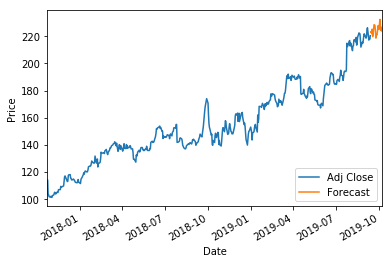

In [13]:
# Printing the forecast linear
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

[225.14395998 225.8854945  224.70150405 226.90907997 223.12468845
 223.23293337 227.34655402 230.39733372 231.27625827 230.77681616
 229.25548545 222.71624522 223.47355358 223.47520228 225.0098771
 228.52080639 230.5916273  228.40474136 228.44154811 232.70757625
 235.11913495 231.75713451 227.97989646 226.19661266 229.20599123] 0.9729419769962538 25


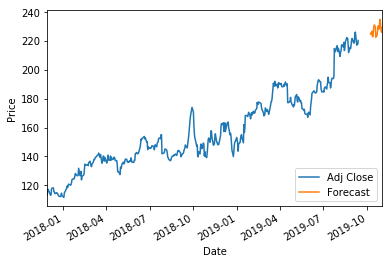

In [14]:
# Printing the forecast quadratic
forecast_set = clfpoly2.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencepoly2, forecast_out)

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

[220.75       220.84999847 218.64000702 222.44999695 173.16500092
 219.52500153 220.84999847 220.84999847 218.64000702 196.30000305
 191.50999451 220.02500153 201.42500305 196.30000305 217.53500366
 220.84999847 218.53500366 219.1700058  218.53500366 223.07499695
 218.53500366 157.44499969 174.5        219.52500153 218.53500366] 0.9554593868161738 25


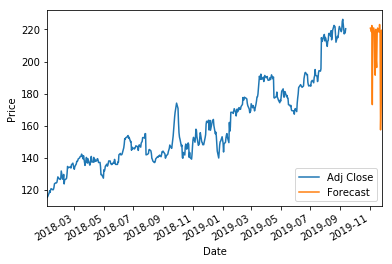

In [15]:
# Printing the forecast knn
forecast_set = clfknn.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidenceknn, forecast_out)

last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()